## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Attribute Information:

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary - education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high- )
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very hig- h)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)

### these grades are related with the course subject, Math or Portuguese:
- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
## importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Student_df = pd.read_csv ('students-data-1.csv' , delimiter= ';') ## Loading the data using delimiter 
print ("Shape of data",Student_df.shape) # shape of data
Student_df.head(10)

Shape of data (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [5]:
print (Student_df.columns)  # checking all coloumns 

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [6]:
Student_df['Number'] = np.arange(0,395)  # creating number columns and using it as a index
Student_df = Student_df.set_index('Number')
# To check missing values Or NAN 
print ('Total missing values in Student_df is  = ' + str(Student_df.isnull().sum().sum()))

Total missing values in Student_df is  = 0


## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
Student_df_catagoricals = Student_df.select_dtypes(include='object') # select_dtypes fro checking non numerical col
print ("shape of the data frame after excluding all numerical rows = " + str(Student_df_catagoricals.shape))
#print (Student_df_catagoricals.info())
print (Student_df_catagoricals.columns)
Student_df_catagoricals.head()

shape of the data frame after excluding all numerical rows = (395, 17)
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
Number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [8]:
df_numerical = Student_df.select_dtypes(include='int64')
print("numerical col shape   " + str(df_numerical.shape))
df_numerical.head()

numerical col shape   (395, 16)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
Student_df.var() # checking variance observationally 

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [10]:
Student_df = Student_df.drop(Student_df.var()[Student_df.var() < 1].index.values, axis=1) # selecting columns has varience less then 1       
Student_df.shape

(395, 27)

In [11]:
#df_numerical = df_numerical.drop(df_numerical[df_numerical[feature].var() > 1].index)

In [12]:
Student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [13]:
for feature in Student_df.columns: # Loop through all columns in the dataframe
    if Student_df.head()[feature].dtype == 'object': # Only apply for columns with categorical strings
        Student_df[feature] = pd.Categorical(Student_df[feature]).codes # Replace strings with an integer
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int8
sex           395 non-null int8
age           395 non-null int64
address       395 non-null int8
famsize       395 non-null int8
Pstatus       395 non-null int8
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int8
Fjob          395 non-null int8
reason        395 non-null int8
guardian      395 non-null int8
schoolsup     395 non-null int8
famsup        395 non-null int8
paid          395 non-null int8
activities    395 non-null int8
nursery       395 non-null int8
higher        395 non-null int8
internet      395 non-null int8
romantic      395 non-null int8
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtypes: int64(10), in

In [14]:
Student_df.head()  # conferming that encoding has been done 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [15]:
Student_df['G1']  = np.where(Student_df['G1']>=10, 'Pass', 'Fail') # discretaizing the continuous 
Student_df['G2']  = np.where(Student_df['G2']>=10, 'Pass', 'Fail')
Student_df['G3']  = np.where(Student_df['G3']>=10, 'Pass', 'Fail')

In [16]:
Student_df.head(5) # conferming thr discreatizing has done 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,Fail,Fail,Fail
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,Fail,Fail,Fail
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,Fail,Fail,Pass
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,Pass,Pass,Pass
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,Fail,Pass,Pass


In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'G3'. 
Student_df['G1']= label_encoder.fit_transform(Student_df['G1']) # converting discreate lable string into numerical value 
Student_df['G2']= label_encoder.fit_transform(Student_df['G2']) 
Student_df['G3']= label_encoder.fit_transform(Student_df['G3']) 
Student_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
Number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [18]:
X = Student_df.drop(columns= 'G3')  ## Input Variables 
y = Student_df['G3']  ## Target Variable

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G2,G3
G1,,,,,,,,,,,,,,,,,,,,,
0,142,142,142,142,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
1,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253


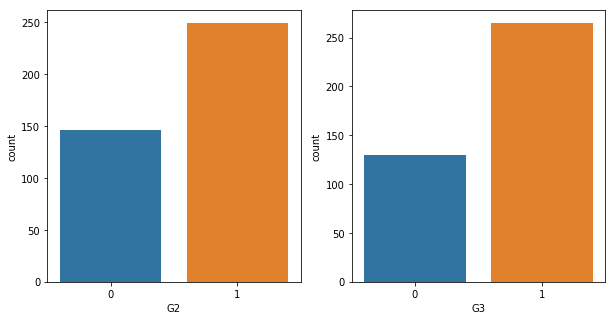

In [19]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, nrows=1) # creating the space for two graphs 
sns.countplot(Student_df['G2'],ax=axs[0])
sns.countplot(Student_df['G3'],ax=axs[1])

Student_df.groupby(["G1"]).count()

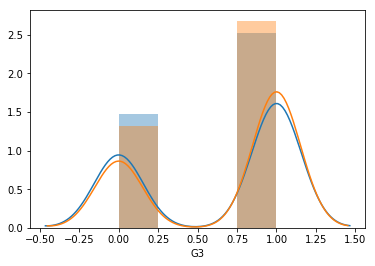

In [20]:
sns.distplot(Student_df['G2'])
sns.distplot(Student_df['G3'])

# Conclusion for G2 and G3
- Most of the Student who passed the G2 exam have passed in the G3 exam also which we have to predict 

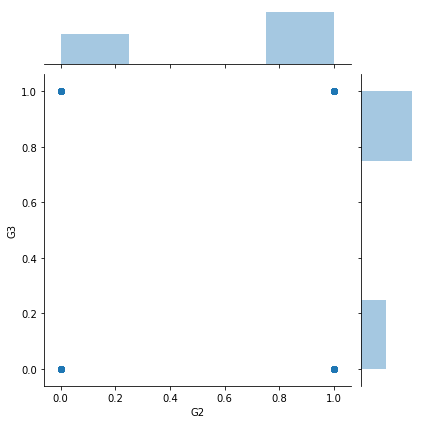

In [21]:
Student_df['Sr_no'] = np.arange(0,395)
sns.jointplot(Student_df['G2'],Student_df['G3']);


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [22]:
Student_df.groupby(["school"]).count()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,goout,Walc,health,absences,G1,G2,G3,Sr_no
school,,,,,,,,,,,,,,,,,,,,,
0,349,349,349,349,349,349,349,349,349,349,...,349,349,349,349,349,349,349,349,349,349
1,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


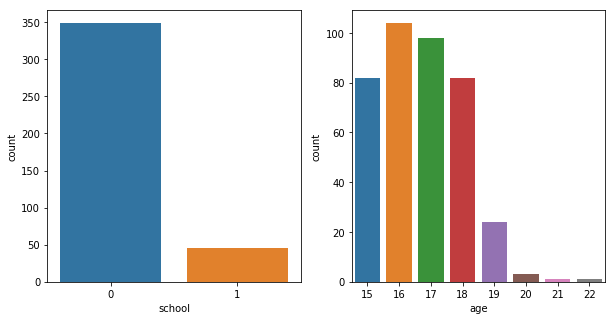

In [23]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
sns.countplot(Student_df['school'],ax=axs[0])
sns.countplot(Student_df['age'],ax=axs[1])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=15)
print ("training data shape ",X_train.shape)

training data shape  (300, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [25]:
print ("size of training set is " + str(X_train.shape))
print ("size of testing set is " + str(X_test.shape))


size of training set is (300, 26)
size of testing set is (95, 26)


In [26]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression() # Instantiating the LogisticRegression object
logreg.fit(X_train, y_train) # logreg object performing fit method on X_train, y_train to learn the relation between them
print (logreg.intercept_)   # logreg object created line's intercept 
print ("intercept ",logreg.coef_)

[0.29743346]
intercept  [[ 0.09682704 -0.01767192 -0.1153577   0.16233612 -0.12632489 -0.55788093
   0.06777901 -0.37737564 -0.10809342  0.06771531  0.07891125  0.12450278
   0.10527903 -0.04862519  0.02995861  0.41852678  0.12748366  0.47193802
   0.66732276 -0.65492384 -0.58761352  0.57935895  0.05980592 -0.00961251
   1.65867592  3.77424997]]


/Users/prashantsharma/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
score = logreg.score(X_test, y_test)  # logreg object performing score method on (X_test, y_test) to give accuracy 
print ("Testing accuracy = ",logreg.score(X_train, y_train))
y_pred = logreg.predict(X_test)# logreg object performing score method on (X_test) to give prediction 
print ("Training accuracy = " , score)

Testing accuracy =  0.93
Training accuracy =  0.9052631578947369


In [28]:
from sklearn.metrics import f1_score
print (f1_score(y_test, y_pred.round()))

0.9291338582677167


# Naive bayes with Iris data

### Import Iris.csv

In [29]:
iris = pd.read_csv ('iris.csv')  
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


/Users/prashantsharma/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/prashantsharma/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


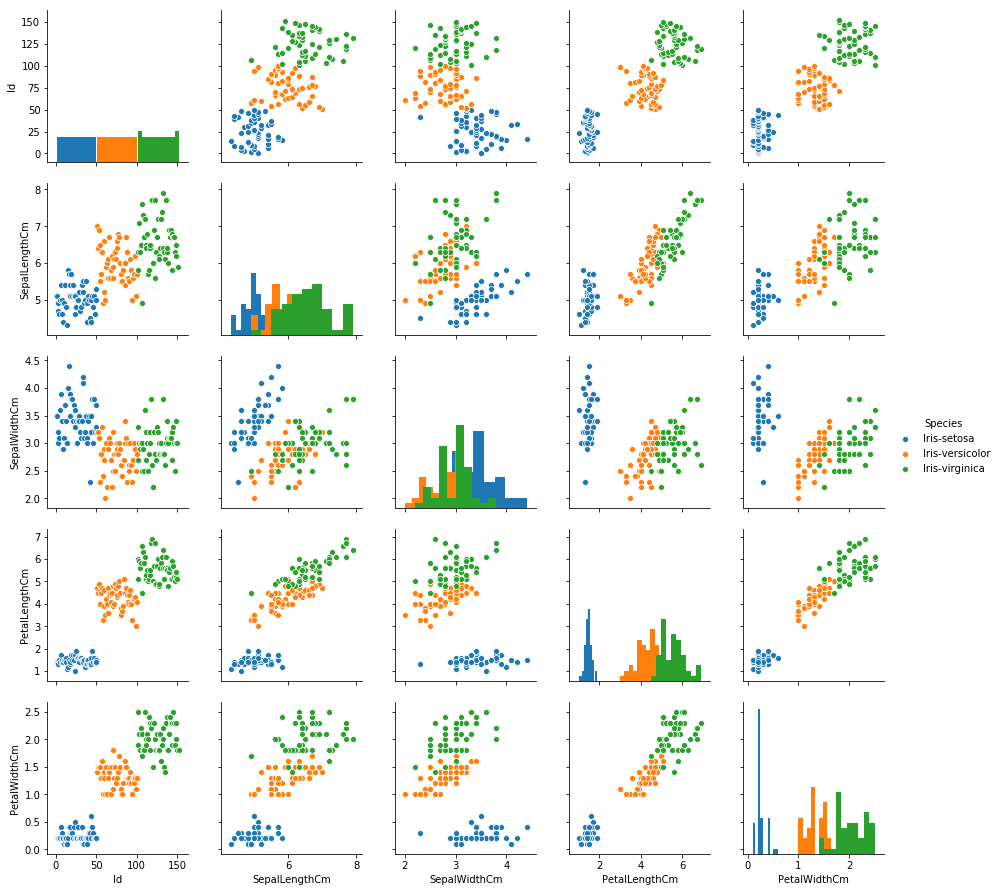

In [30]:
sns.pairplot(iris,hue="Species", diag_kind= 'hist');

In [31]:
iris.isnull().sum() # checking null value in coloumns from our data 

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [32]:
iris["SepalLengthCm"] = iris["SepalLengthCm"].fillna( iris["SepalLengthCm"].median()) # repalcing NaN values by its columns median
iris["SepalWidthCm"] = iris["SepalWidthCm"].fillna( iris["SepalWidthCm"].median())
iris["PetalLengthCm"] = iris["PetalLengthCm"].fillna( iris["PetalLengthCm"].median())
iris["PetalWidthCm"] = iris["PetalWidthCm"].fillna(iris["PetalWidthCm"].median())
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [33]:
#from sklearn import preprocessing
#label_encoder_iris = preprocessing.LabelEncoder()
#iris['Species']= label_encoder.fit_transform(iris['Species'])

iris_X = iris.drop(columns='Species')
iris_y = iris['Species']

### Find the distribution of target variable (Class)

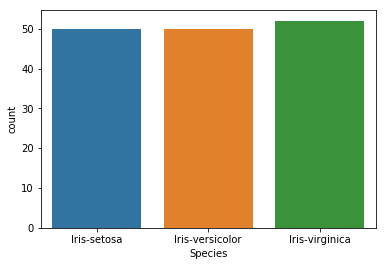

In [80]:
sns.countplot(iris['Species'])

### Plot the distribution of target variable using histogram

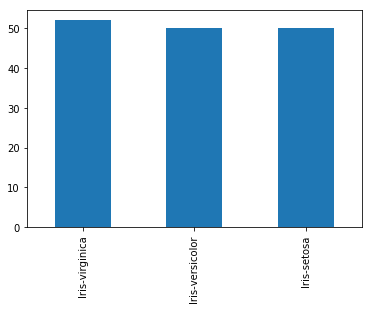

In [34]:
pd.value_counts(iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

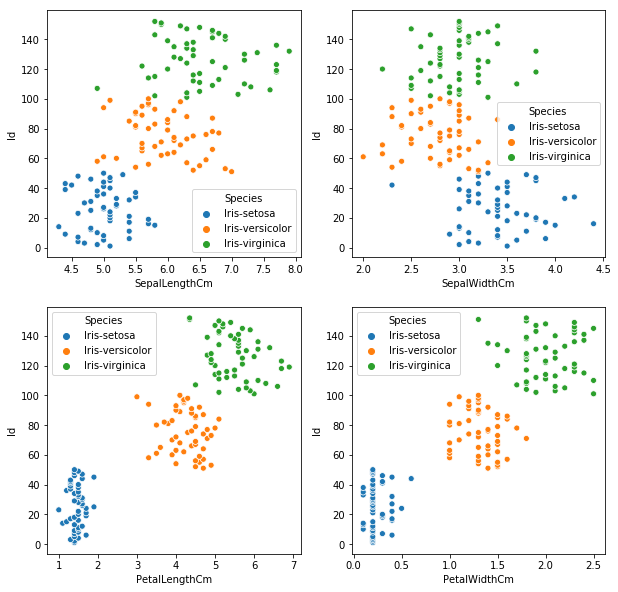

In [35]:
#	Id	SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	Species # Iris-setosa Iris-versicolo Iris-virginica
fig, axs = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
sns.scatterplot(iris['SepalLengthCm'],iris['Id'],hue=iris['Species'], ax=axs[0,0])  # 0 = Iris-setosa
sns.scatterplot(iris['SepalWidthCm'],iris['Id'],hue=iris['Species'],ax=axs[0,1])    # 1 = Iris-versicolo 
sns.scatterplot(iris['PetalLengthCm'],iris['Id'],hue=iris['Species'],ax=axs[1,0])   # 2 = Iris-virginica
sns.scatterplot(iris['PetalWidthCm'],iris['Id'],hue=iris['Species'],ax=axs[1,1])

## Insights from Scatter Plot
- Petal length is a good feature for classificaton 
- Iris -setosa has sepeal length small and sepal width is large 
- Iris -setosa has petal length small and petal width is small 
- Iris -versicolor has speal length medium and sepal width is medium
- Iris -versicolor has petal length medium and petal width is medium
- Iris -verginica has speal length large and sepal width is medium
- Iris -verginica has petal length large and petal width is large
- Sepal width is not a good feature for classification

### Summary Statistics and explain insights for at least 2 variables

 

In [83]:
iris.describe()

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5


# Insight of iris data
- Sepal Length have normal distribution as meadian and mean are almost at same point 
- Sepal width is not normally distributed as its meadian and mean are away from each other 
- petal length may have outliers on lower side as minimum values and mean has more diffrence then its higher value
- petal width may have outliers on upper side as minimum values and mean has less diffrence then its higher value

### Correlation among all variables and give your insights

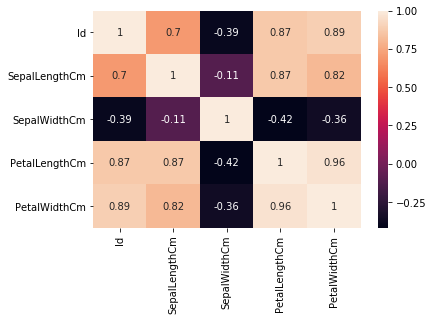

In [84]:
sns.heatmap(iris.corr(), annot= True)

## Insights from correlation 
- Sepal lenght have higher correlation with petal width and petal length
- petal lenght and petal width are also correlated with good degree
- Positive and Negative correlation is ovsevalbe in correlation heatmap
- we can obsever negative correlation also of very weak degree

### Split data in Training and Validation in 80:20

In [95]:
from sklearn import preprocessing
label_encoder_iris = preprocessing.LabelEncoder()    # Instantiating the labelencodr object 
iris['Species']= label_encoder.fit_transform(iris['Species'])  # fiting fit_transform on 'Species' column for label encoding


In [96]:
iris.head() # verifying the encoding is done properly or not 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [97]:
from sklearn.model_selection import train_test_split  # importing laibrary 
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=15) # spliting the data
print ("shape of tranining set",iris_X_train.shape) # conferming shape of traing and test set 


shape of tranining set (121, 5)


### Do Feature Scaling

In [98]:
from sklearn.preprocessing import MinMaxScaler #subject performing action on data
scaler = MinMaxScaler()  # Instantiating MinMaxScalar object
scaler.fit(iris_X_train) # scaler object prforming Fiting on iris_X_train data to learn converion factor use for scaling data
scaled_iris_X_train = scaler.transform(iris_X_train) #scaler object prforming transform method on siris_X_train uses same learned conversion factor for scaling  
scaled_iris_X_test = scaler.transform(iris_X_test)  #scaler object prforming transform method on iris_X_test uses same learned conversion factor for scaling

### Train and Fit NaiveBayes Model

In [99]:
from sklearn.naive_bayes import GaussianNB  # Importing gaussianNB 
model = GaussianNB() # Instantiating GaussianNB object by name model
model.fit(scaled_iris_X_train, iris_y_train) # Modal object performing fit method on Iris training data to learn the RELATION between INPUT AND OUTPUT

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
predicted = model.predict(scaled_iris_X_test) # Modal object performing predicted Method on iris_test data for prediting labels learn by fitting 

### Print Accuracy and Confusion Matrix and Conclude your findings

In [91]:
from sklearn import metrics
print(metrics.classification_report(iris_y_test, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        31
      macro avg       0.97      0.97      0.97        31
   weighted avg       0.97      0.97      0.97        31



In [92]:
(metrics.confusion_matrix(iris_y_test, predicted))

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)

In [93]:
model.score(scaled_iris_X_test,iris_y_test)

0.967741935483871

In [94]:
model.score(scaled_iris_X_train,iris_y_train)

1.0